# Import Libraries

In [7]:
import numpy as np
import sklearn as sl
import pandas as pd
import seaborn as sns
import random as rnd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay


# Import Dataset

In [8]:
Airline = pd.read_csv('Invistico_Airline.csv')#get the file

# View Dataset

In [9]:
Airline

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [10]:
#get the information about data 
Airline.info

<bound method DataFrame.info of         satisfaction  Gender      Customer Type  Age   Type of Travel  \
0          satisfied  Female     Loyal Customer   65  Personal Travel   
1          satisfied    Male     Loyal Customer   47  Personal Travel   
2          satisfied  Female     Loyal Customer   15  Personal Travel   
3          satisfied  Female     Loyal Customer   60  Personal Travel   
4          satisfied  Female     Loyal Customer   70  Personal Travel   
...              ...     ...                ...  ...              ...   
129875     satisfied  Female  disloyal Customer   29  Personal Travel   
129876  dissatisfied    Male  disloyal Customer   63  Personal Travel   
129877  dissatisfied    Male  disloyal Customer   69  Personal Travel   
129878  dissatisfied    Male  disloyal Customer   66  Personal Travel   
129879  dissatisfied  Female  disloyal Customer   38  Personal Travel   

           Class  Flight Distance  Seat comfort  \
0            Eco              265       

* as shown above data there are 393 missing values in Arrival Delay in Minutes feature 

# Features Analysis

* there are two types of data in this dataset,such as categorical data and numerical data
* Categorical data :  satisfaction, Gender, Customer Type, Type of Travel, Class.
* Numerical data :  Age, Flight Distance, Seat comfort, Departure/Arrival time convenient, Food and drink, Gate location, Inflight wifi service, Inflight entertainment, Online support, Ease of Online booking, On-board service, Leg room service, Baggage handling, Checkin service, Cleanliness, Online boarding, Departure Delay in Minutes, Arrival Delay in Minutes.

In [11]:
#categorical data analysis
C_Data = ['satisfaction','Gender','Customer Type','Type of Travel','Class']
for i in C_Data:
    C=("{}\n ".format(Airline[i].value_counts()))
    print (C)
  

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64
 
Female    65899
Male      63981
Name: Gender, dtype: int64
 
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
 
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
 
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64
 


In [12]:
#mapping categorical data
#satisfied and dissatisfide
Map_satisfaction = {'satisfied':1,'dissatisfied':0}
Airline['satisfaction'] = Airline['satisfaction'].map(Map_satisfaction)

#male and female
Map_Gender = {"Male":1,"Female":2}
Airline["Gender"]=Airline["Gender"].map(Map_Gender)

#Loyal and disloyal
Map_CustomerType = {"Loyal Customer":0,"disloyal Customer":1}
Airline['Customer Type']= Airline['Customer Type'].map(Map_CustomerType)

#Business travel and personal travel
Map_BusinessTravel = {'Business travel':1,"Personal Travel":2}
Airline['Type of Travel']=Airline['Type of Travel'].map(Map_BusinessTravel)

#Business and Eco and Eco plus
Map_class = {'Business':1,'Eco':2,'Eco Plus':3}
Airline['Class']=Airline['Class'].map(Map_class)


In [13]:
C_Data = ['satisfaction','Gender','Customer Type','Type of Travel','Class']
for i in C_Data:
    C=("{}\n ".format(Airline[i].value_counts()))
    print (C)

1    71087
0    58793
Name: satisfaction, dtype: int64
 
2    65899
1    63981
Name: Gender, dtype: int64
 
0    106100
1     23780
Name: Customer Type, dtype: int64
 
1    89693
2    40187
Name: Type of Travel, dtype: int64
 
1    62160
2    58309
3     9411
Name: Class, dtype: int64
 


<AxesSubplot:xlabel='Class', ylabel='count'>

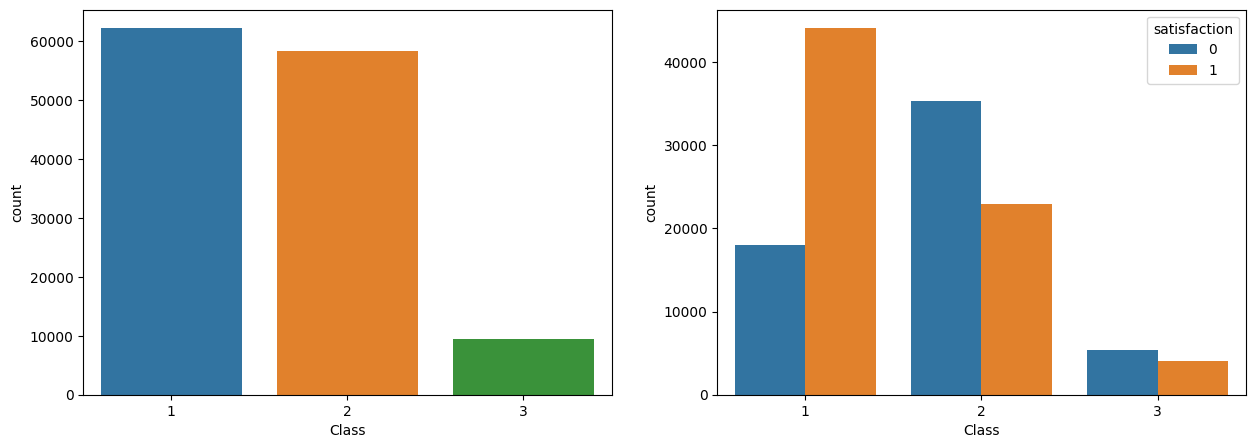

In [14]:
#numerical data analysis
fig = plt.figure(figsize=(15,5))
plt.subplot(121)#
sns.countplot(x='Class',data=Airline)
plt.subplot(122)
sns.countplot(x='Class',hue='satisfaction',data=Airline)

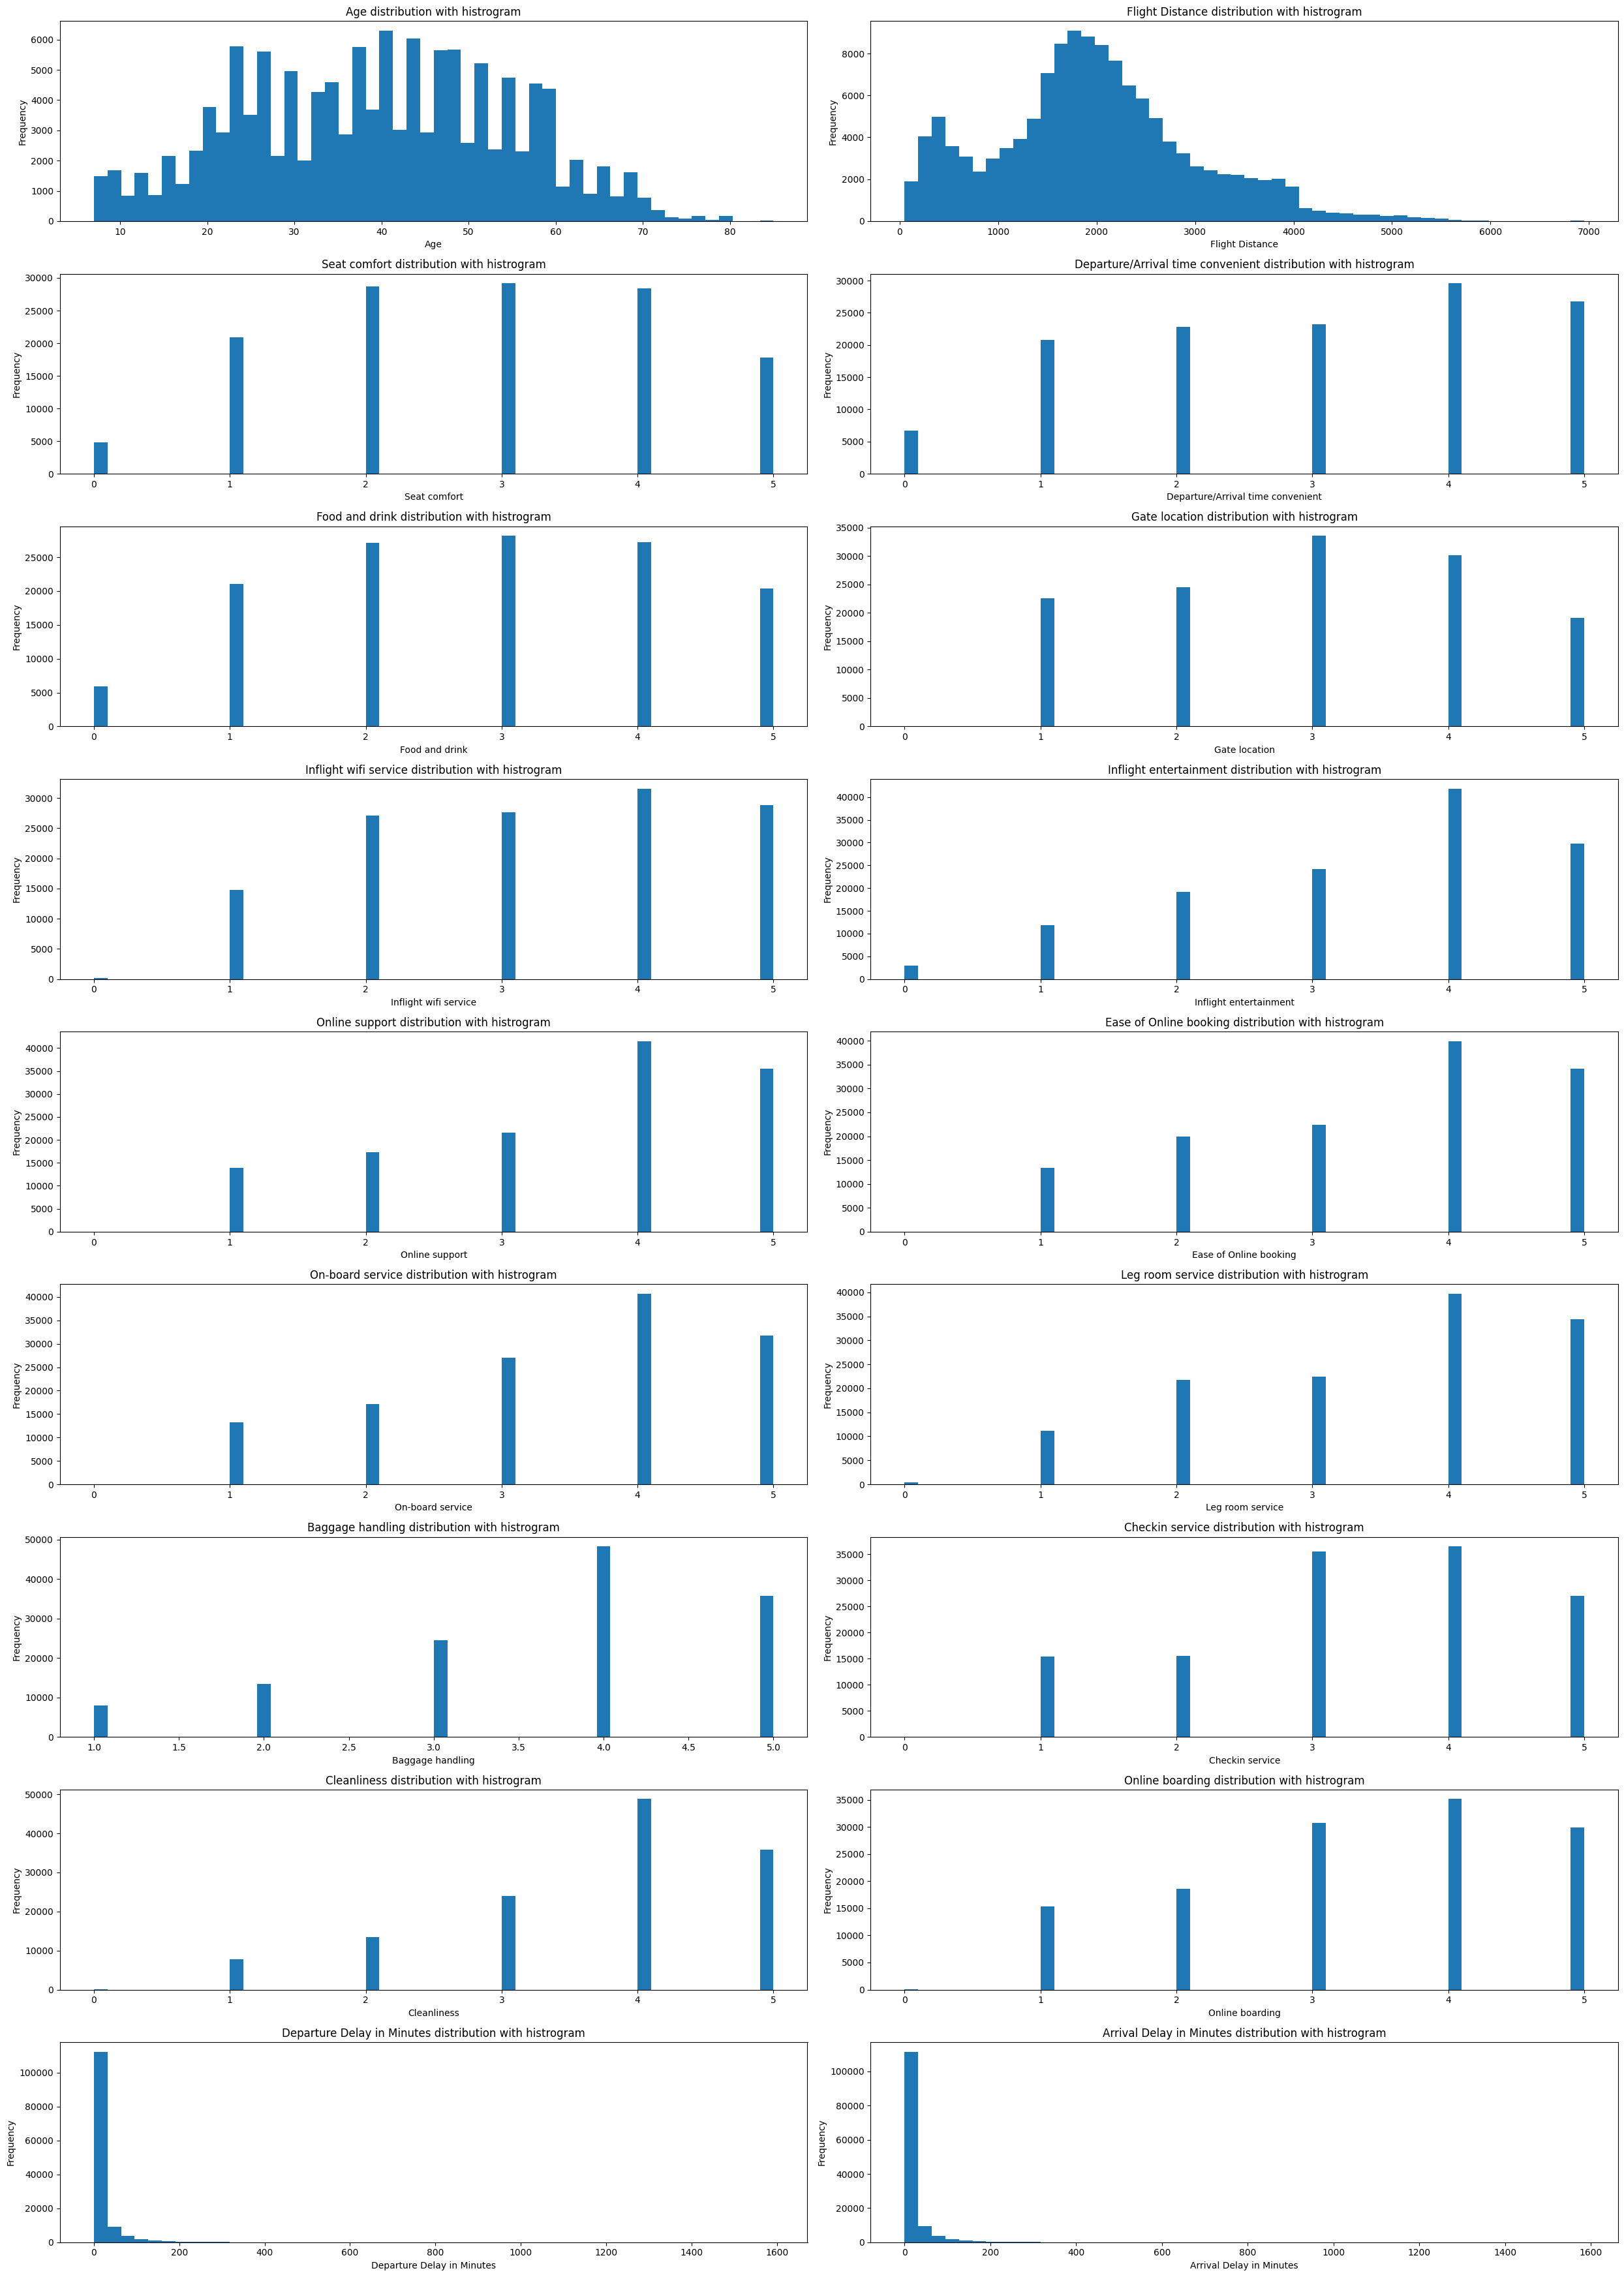

In [15]:
N_Data=["Age","Flight Distance","Seat comfort","Departure/Arrival time convenient","Food and drink","Gate location","Inflight wifi service","Inflight entertainment","Online support","Ease of Online booking","On-board service","Leg room service","Baggage handling","Checkin service","Cleanliness","Online boarding","Departure Delay in Minutes","Arrival Delay in Minutes"]
fig,ax = plt.subplots(nrows=9,ncols=2,figsize=(25,35))
row=0
col=0
for i in N_Data:
    if(col==2):
        row+=1
        col=0
    ax[row,col].hist(Airline[i],bins=50)
    ax[row,col].set_xlabel(i)
    ax[row,col].set_ylabel('Frequency')
    ax[row,col].set_title("{} distribution with histrogram".format(i))
    col+=1
fig.tight_layout()
    

<AxesSubplot:xlabel='Age', ylabel='count'>

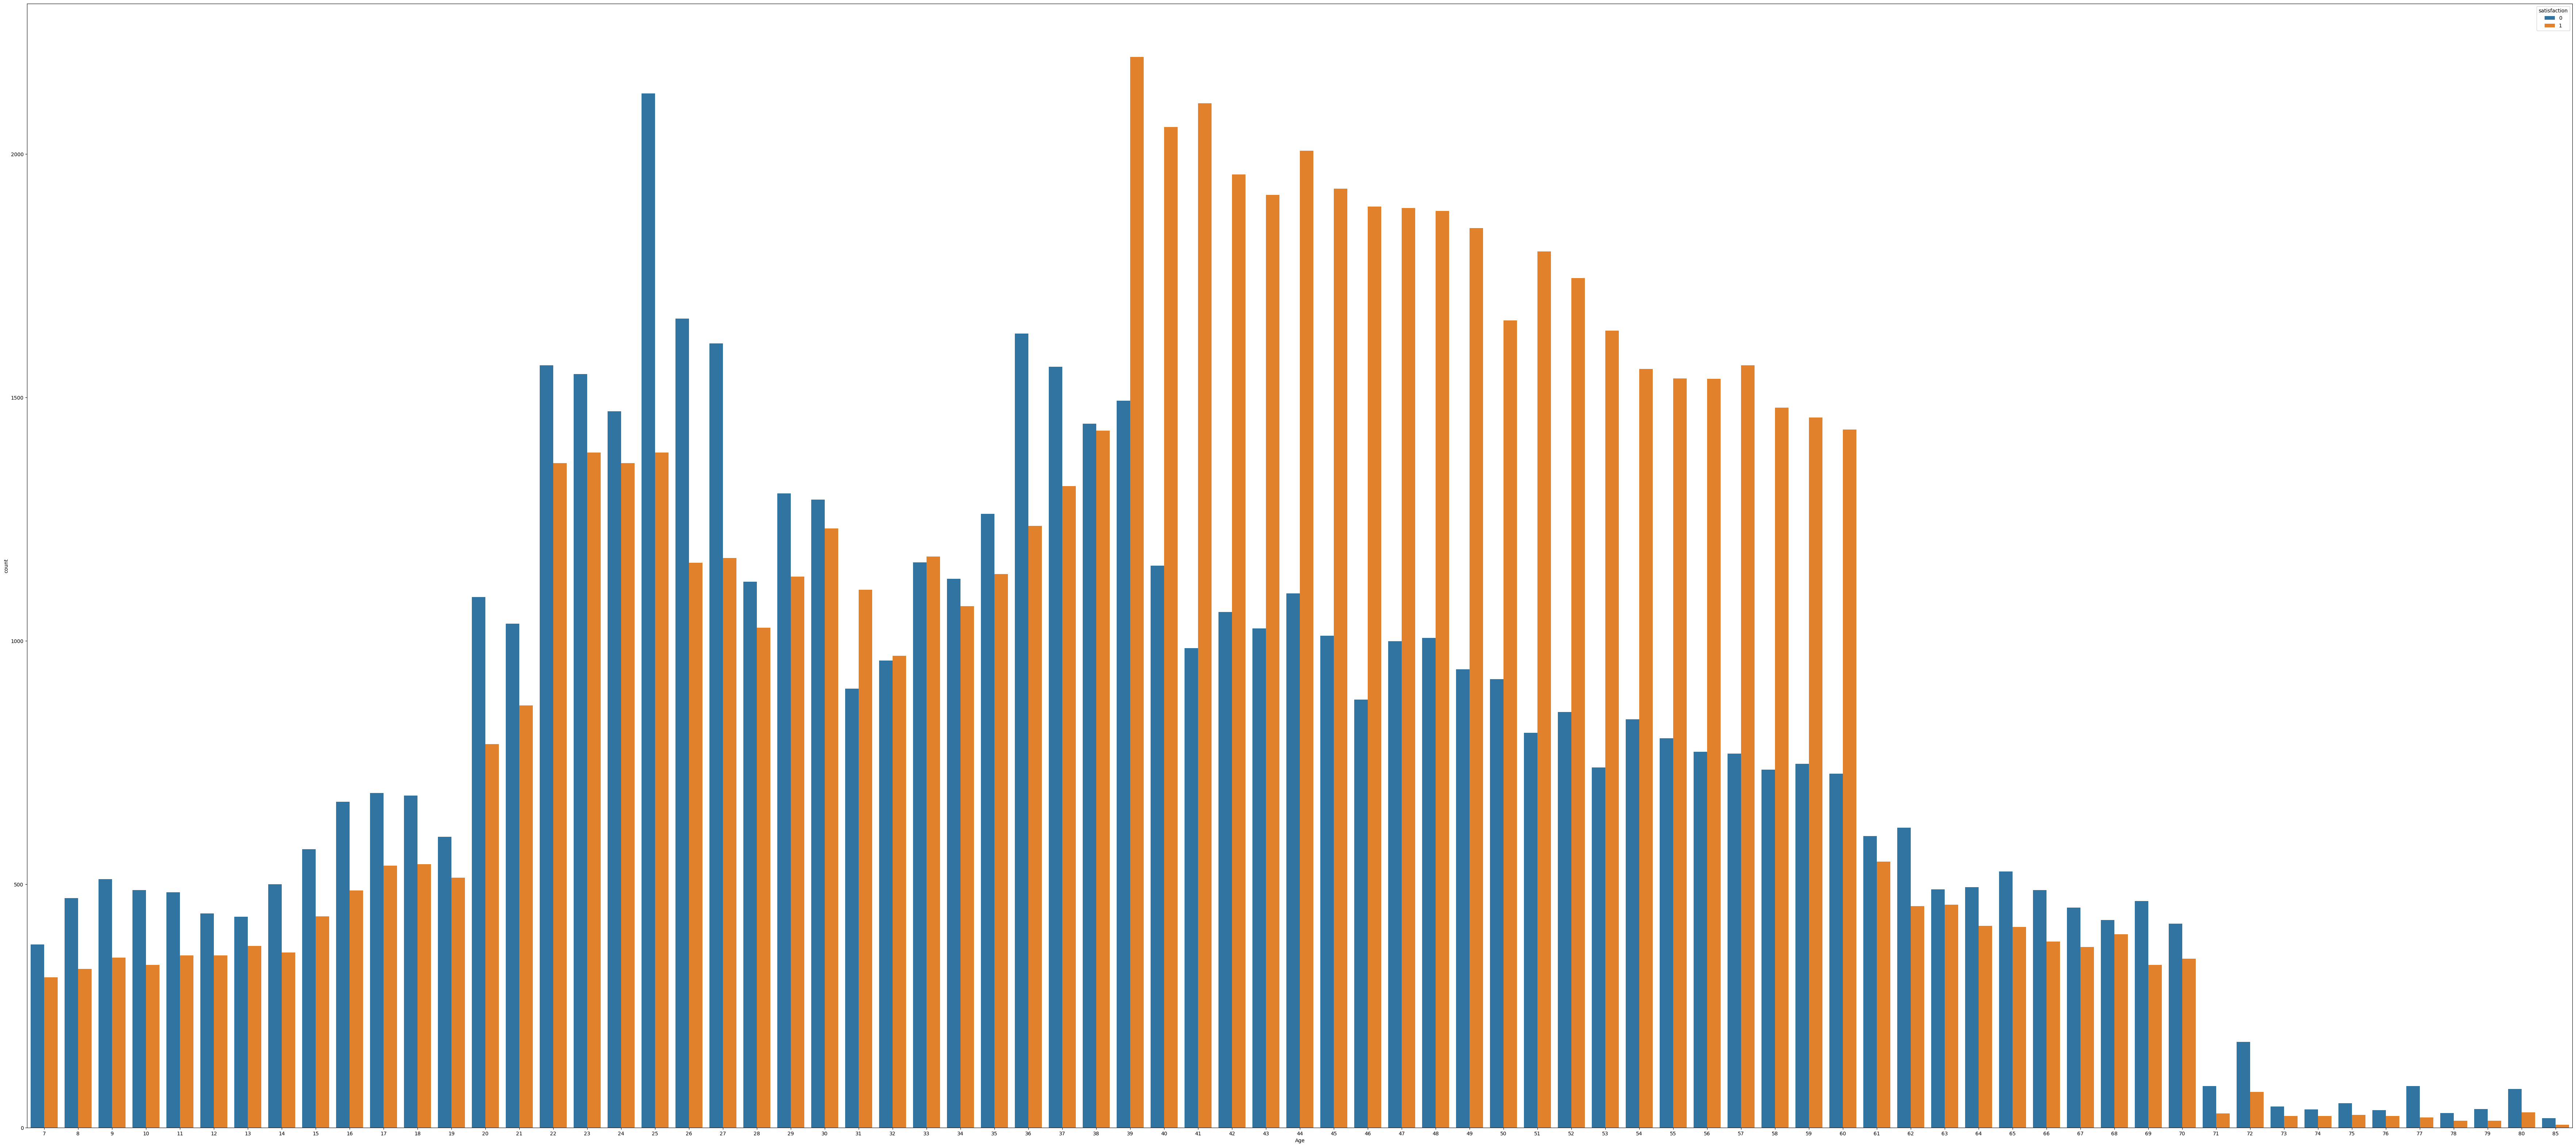

In [16]:
plt.figure(figsize=(90,40))
sns.countplot(x='Age',hue='satisfaction',data=Airline)

In [17]:
#checking sum of null values
Airline.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

# Prepare the data for training and data cleaning


In [18]:
#There is 393 null values in Arrival Delay in Minutes so drop these rows or replace the values
Airline['Arrival Delay in Minutes']=Airline['Arrival Delay in Minutes'].fillna(Airline['Arrival Delay in Minutes'].mean())
Airline.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [19]:
#save data set after clesaning ONLY IF YOU WANT
#data = np.array(Airline.iloc[:,1:23])
#target = np.array(Airline.iloc[:,0])

#np.save('data',data)
#np.save('target',target)

#data= np.load('data.npy')
#target=np.load('target.npy')

In [20]:
#save intial data
pickle.dump(Airline, open("Invistico_Airline_initial.sav","wb"))

# Visualization of preprocessed data

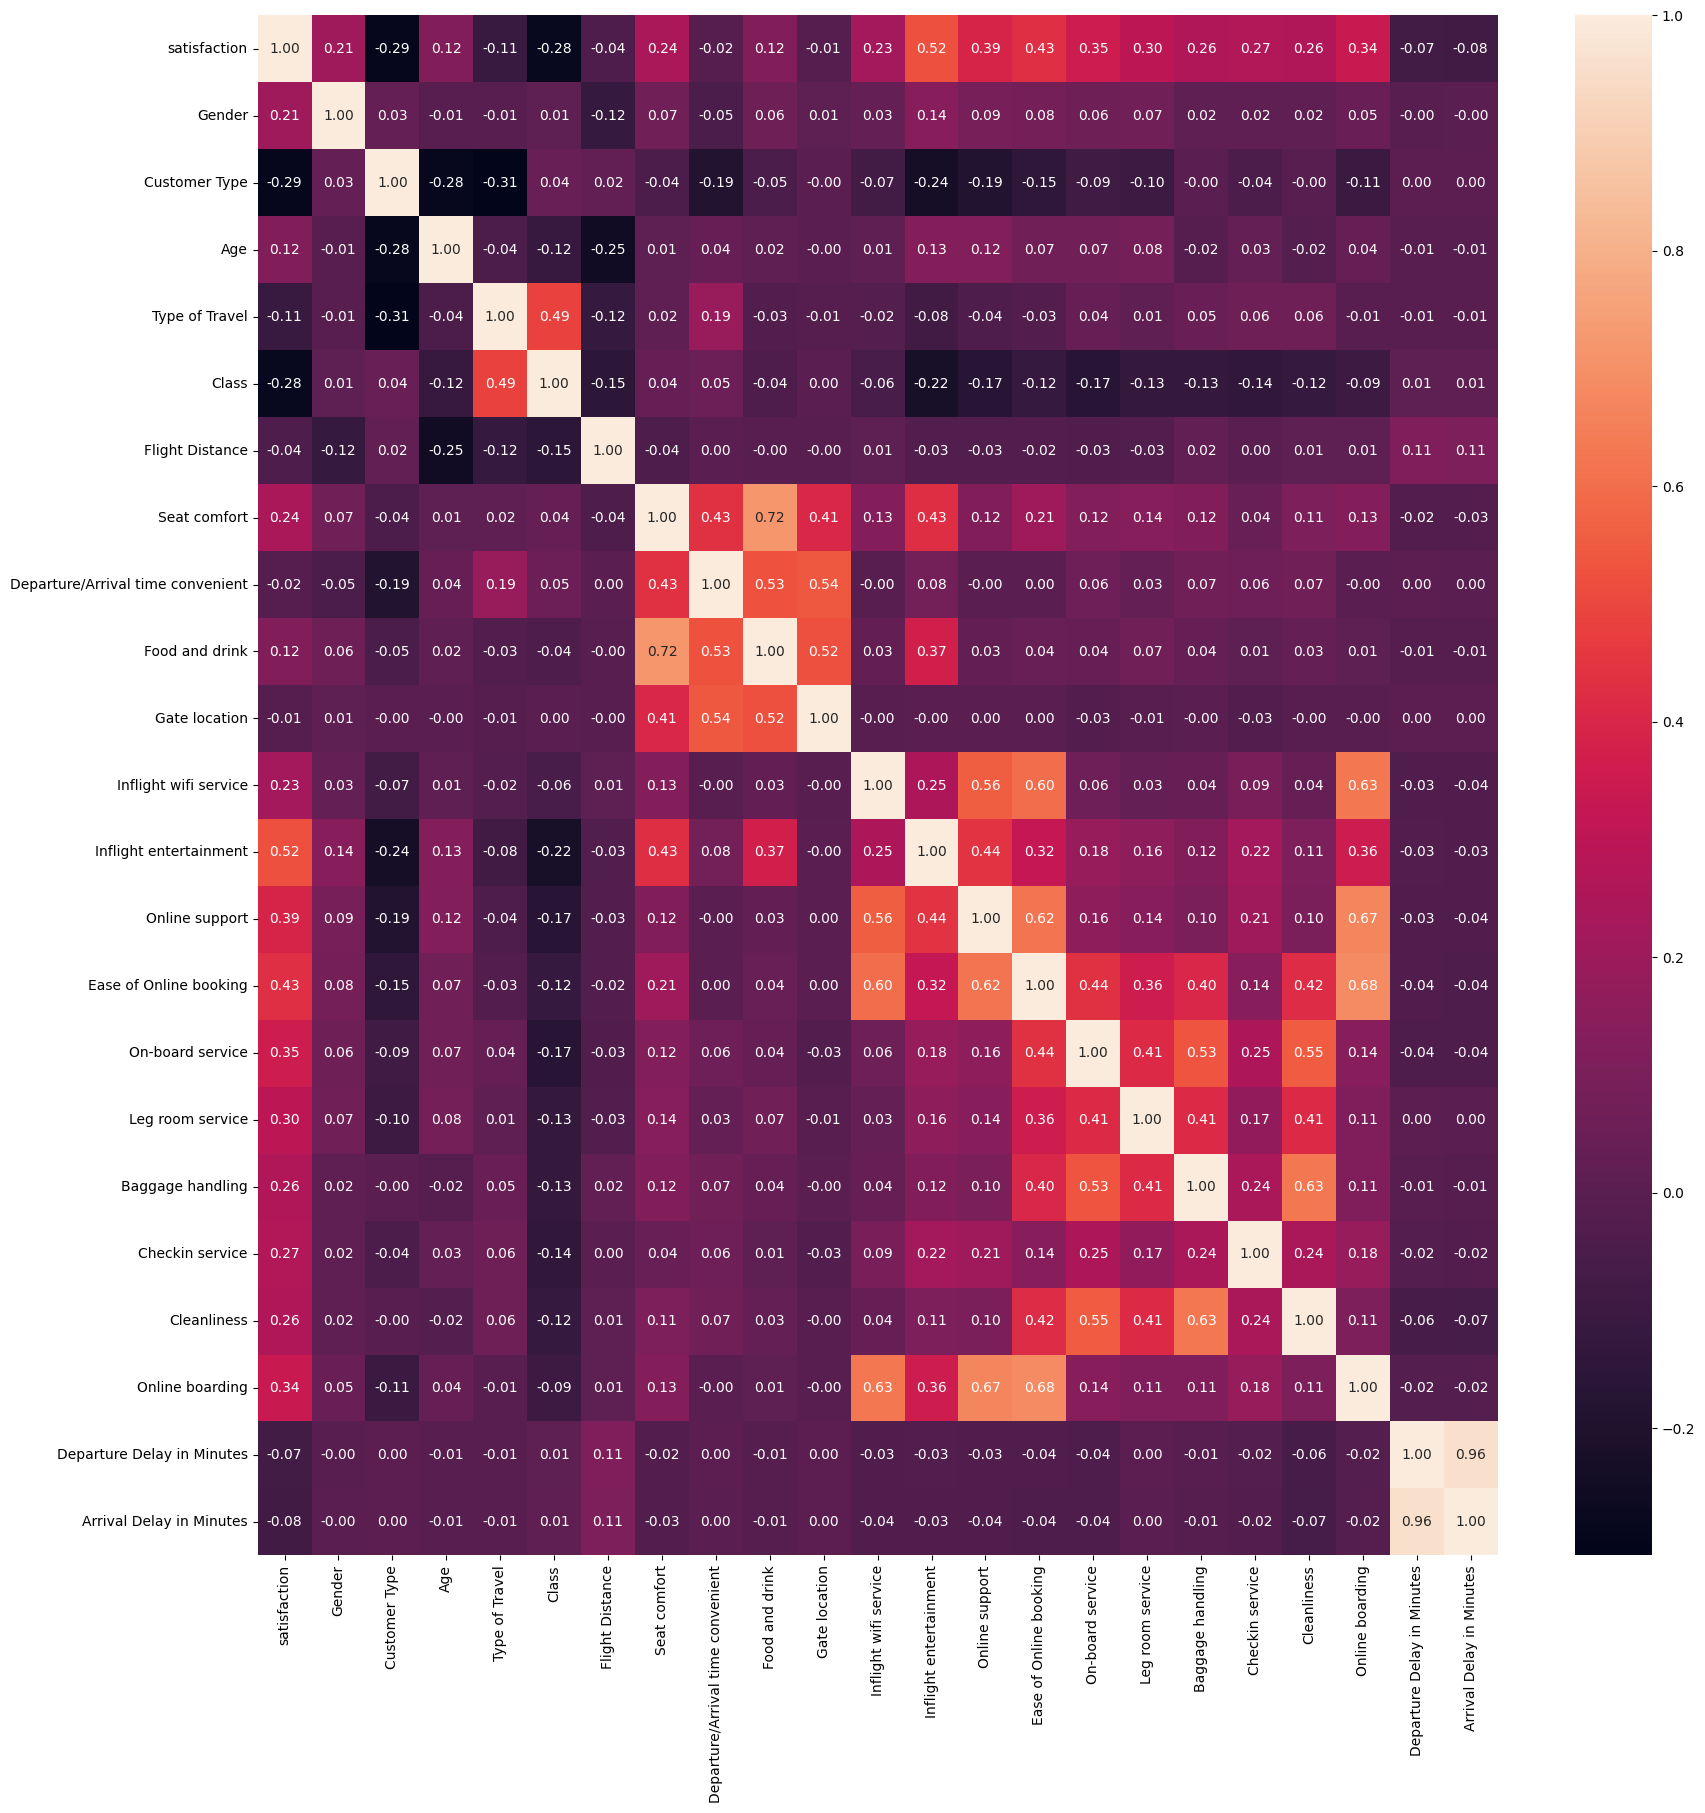

In [21]:
#correlation between numeric values

AL_visualiz =["satisfaction", "Gender", "Customer Type", "Age" , "Type of Travel", "Class" , "Flight Distance" , "Seat comfort" ,"Departure/Arrival time convenient" ,"Food and drink"
, "Gate location" ,"Inflight wifi service","Inflight entertainment","Online support","Ease of Online booking"
,"On-board service","Leg room service","Baggage handling","Checkin service","Cleanliness","Online boarding"
,"Departure Delay in Minutes", "Arrival Delay in Minutes"]

plt.subplots(figsize=(20,20))
sns.heatmap(Airline[AL_visualiz].corr(),annot=True,fmt='.2f')
plt.show()


* Departure delay in Minutes and the Arrival Delay in Minutes features have the weakest correlation with all other features.
* Therefore these two features are going to be dropped

In [22]:
#check features with satisfaction
def chart(feature):
    plot = sns.barplot(x=feature,y="satisfaction",hue="Class",data=Airline)
    plot=plot.set_ylabel('Satisfaction')
    

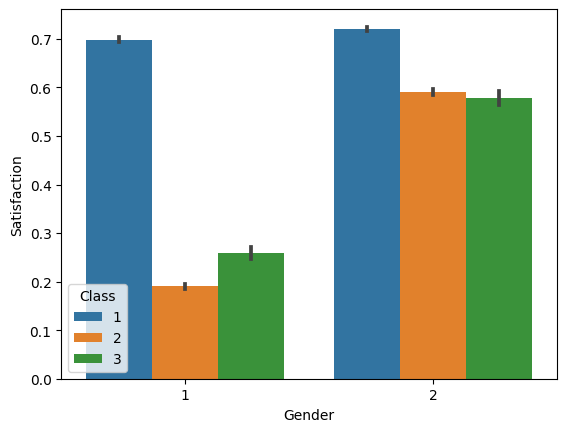

In [23]:
chart('Gender')    

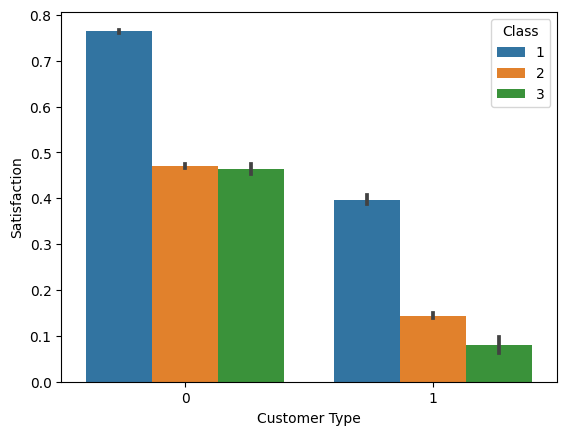

In [24]:
chart("Customer Type")

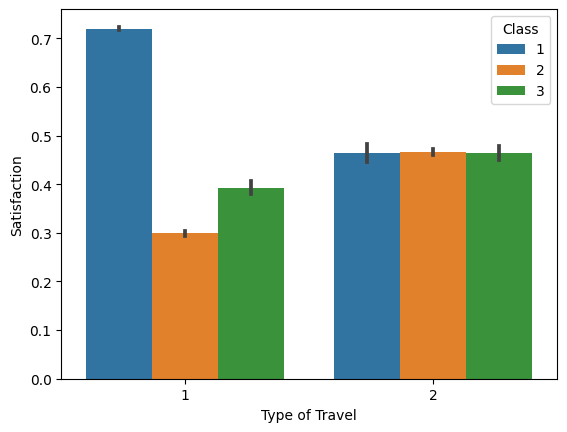

In [25]:
chart("Type of Travel")

c:\Users\kosal\Desktop\env2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\kosal\Desktop\env2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


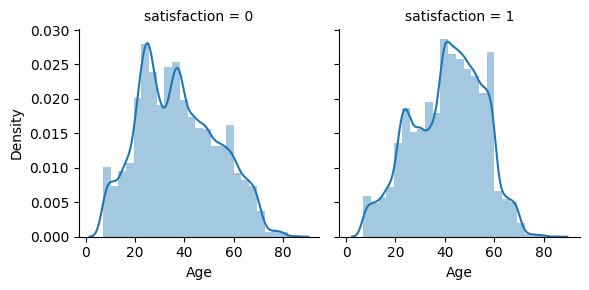

In [26]:
graph = sns.FacetGrid(Airline, col = "satisfaction")
graph.map(sns.distplot, "Age", bins = 25)
plt.show()

<AxesSubplot:xlabel='satisfaction', ylabel='Age'>

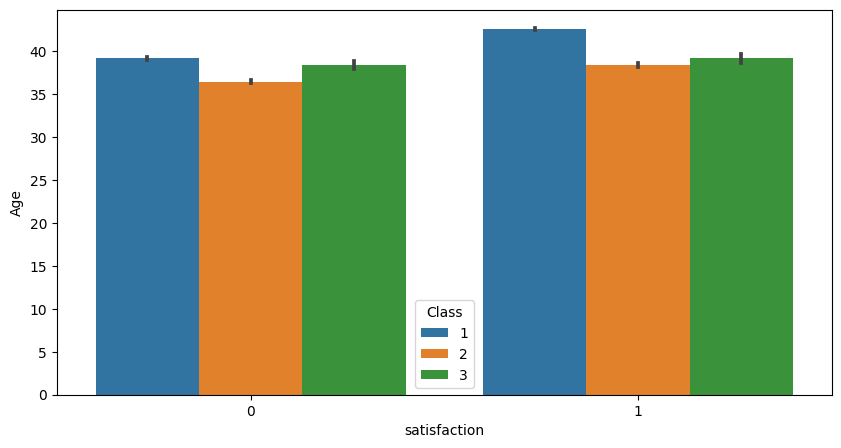

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(x='satisfaction',y='Age',hue='Class',data=Airline)

# Feature Engineering

In [28]:
Airline = Airline.drop(['Departure Delay in Minutes'],axis=1)
Airline

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes
0,1,2,0,65,2,2,265,0,0,0,...,4,2,3,3,0,3,5,3,2,0.0
1,1,1,0,47,2,1,2464,0,0,0,...,2,2,3,4,4,4,2,3,2,305.0
2,1,2,0,15,2,2,2138,0,0,0,...,0,2,2,3,3,4,4,4,2,0.0
3,1,2,0,60,2,2,623,0,0,0,...,4,3,1,1,0,1,4,1,3,0.0
4,1,2,0,70,2,2,354,0,0,0,...,3,4,2,2,0,2,4,2,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,2,1,29,2,2,1731,5,5,5,...,5,2,2,3,3,4,4,4,2,0.0
129876,0,1,1,63,2,1,2087,2,3,2,...,1,1,3,2,3,3,1,2,1,172.0
129877,0,1,1,69,2,2,2320,3,0,3,...,2,2,4,4,3,4,2,3,2,163.0
129878,0,1,1,66,2,2,2450,3,2,3,...,2,2,3,3,2,3,2,1,2,205.0


In [29]:
Airline = Airline.drop(['Arrival Delay in Minutes'],axis=1)
Airline

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,1,2,0,65,2,2,265,0,0,0,...,2,4,2,3,3,0,3,5,3,2
1,1,1,0,47,2,1,2464,0,0,0,...,0,2,2,3,4,4,4,2,3,2
2,1,2,0,15,2,2,2138,0,0,0,...,2,0,2,2,3,3,4,4,4,2
3,1,2,0,60,2,2,623,0,0,0,...,3,4,3,1,1,0,1,4,1,3
4,1,2,0,70,2,2,354,0,0,0,...,4,3,4,2,2,0,2,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,2,1,29,2,2,1731,5,5,5,...,2,5,2,2,3,3,4,4,4,2
129876,0,1,1,63,2,1,2087,2,3,2,...,2,1,1,3,2,3,3,1,2,1
129877,0,1,1,69,2,2,2320,3,0,3,...,3,2,2,4,4,3,4,2,3,2
129878,0,1,1,66,2,2,2450,3,2,3,...,3,2,2,3,3,2,3,2,1,2


# Split train set and test set

In [30]:
column_names = Airline.iloc[:,1:21].columns
column_names

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding'],
      dtype='object')

In [31]:
X = Airline.drop('satisfaction',axis=1).values
Y = Airline['satisfaction'].values

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

#print(X_train.shape)
#print(Y_train.shape)

#print(X_test.shape)
#print(Y_test.shape)

In [32]:
breakpoint()

# Random Forest Classifier

In [33]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [34]:
classifier.score(X_test,Y_test)

0.9556513704958424

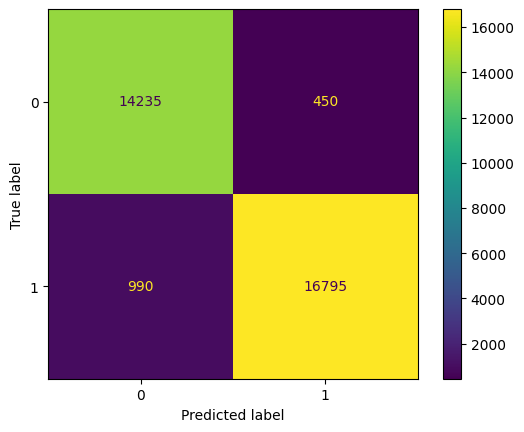

In [35]:
# Generate predictions with the best model
y_pred = classifier.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [36]:
from sklearn.metrics import accuracy_score

# Predict on training data
train_predictions = classifier.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_predictions)

# Predict on testing data
test_predictions = classifier.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_predictions)

# Print accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.9969920952674264
Testing Accuracy: 0.9556513704958424


In [37]:
from sklearn.model_selection import GridSearchCV

# Set up hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Use the best model to predict on the test set
best_classifier = grid_search.best_estimator_
test_predictions = best_classifier.predict(X_test)

# Evaluate accuracy
test_accuracy = accuracy_score(Y_test, test_predictions)
print(f"Testing Accuracy with best hyperparameters: {test_accuracy}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters:  {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Testing Accuracy with best hyperparameters: 0.9611025562057284


In [38]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(classifier, X, Y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores: ", cross_val_scores)
print("Mean CV Score: ", cross_val_scores.mean())


Cross-Validation Scores:  [0.91079555 0.81419497 0.898765 0.98028658 0.76828927]
Mean CV Score:  0.8801093316907915


In [ ]:
raise SystemExit("Stop right there!")

# Decion Tree classifier

In [39]:
model = DecisionTreeClassifier(criterion='gini',max_depth = 21 )#max_depth = length of the decision tree
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=21)

In [40]:
#calculate the accuracy
model.score(X_test,Y_test)

0.9423467816445951

In [41]:
result = model.predict([(2, 0, 25, 1, 1, 489, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)])[0]
lbl_dict = {0:'Dissatisfied',1:'Satisfied'}
prediction = lbl_dict[result]
print(prediction)

Dissatisfied


In [42]:
result = model.predict([(2,0,64,2,2,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2)])[0]
lbl_dict = {0:'Dissatisfied',1:'Satisfied'}
prediction = lbl_dict[result]
print(prediction)

Satisfied


In [43]:
#save the model using joblib
import joblib

joblib.dump(model,'Invistico_Airline_Classification_DecisionTree.sav')

['Invistico_Airline_Classification_DecisionTree.sav']

In [44]:
#save the model using pickle
import pickle
pickle.dump(model, open("Invistico_Airline_Classification_DecisionTree.pkl","wb"))

In [45]:
#plot the decision tree
#dot_data= tree.export_graphviz(model,out_file = "mytree.dot",feature_names= Airline.columns[1:23],class_names =["satisfied","dissatisfied"])
#with open("mytree.dot")as f:
    #dot_graph = f.read()
#graphviz.Source(dot_graph)

In [46]:
#dot_data= tree.export_graphviz(model,out_file=None,feature_names=column_names,class_names=["satisfied","dissatisfied"],filled=True, rounded = True,special_characters=True)
#graph=graphviz.Source(dot_graph)
#graph.render('dtree_render',view=True)


# K Nearest Neighbors Calssifier

In [47]:
#define a general function for showing the learning curve for any classifier
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import make_scorer, accuracy_score

def plotLearningCurves(X_train,Y_train,classifier,title):
    train_sizes,train_scores,test_scores = learning_curve(classifier,X_train,Y_train,cv=5,scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    
    plt.plot(train_sizes, train_scores_mean, label='Training Error')
    plt.plot(train_sizes,test_scores_mean, label='Cross Validation Error')
    
    plt.legend()
    plt.grid()
    plt.title(title, fontsize = 15, y = 1.03)
    plt.xlabel('Training Error', fontsize = 12)
    plt.ylabel('Cross Validation Error', fontsize = 12)
    plt.tight_layout()

In [48]:
#define a general function for showing the validation curve for any classifier
def plotValidationCurves(X_train,Y_train,classifier,param_name,param_range,title):
    train_scores, test_scores = validation_curve(classifier, X_train, Y_train, param_name = param_name, param_range = param_range,cv=5, scoring="accuracy")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(param_range, train_scores_mean, label="Training Error")
    plt.plot(param_range, test_scores_mean, label="Cross Validation Error")

    plt.legend()
    plt.grid()
    plt.title(title, fontsize = 15, y = 1.03)
    plt.xlabel('Training Error', fontsize = 12)
    plt.ylabel('Cross Validation Error', fontsize = 12)
    plt.tight_layout()

In [ ]:
#Results for neighbors =1

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve

knn = KNeighborsClassifier(1)
knn.fit(X_train, Y_train)
knnPredictions1 = knn.predict(X_test)

print(accuracy_score(Y_test, knnPredictions1))
print(confusion_matrix(Y_test, knnPredictions1))
print(classification_report(Y_test, knnPredictions1))

0.7602402217431475
[[10846  3856]
 [ 3929 13839]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.74     14702
           1       0.78      0.78      0.78     17768

    accuracy                           0.76     32470
   macro avg       0.76      0.76      0.76     32470
weighted avg       0.76      0.76      0.76     32470



/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


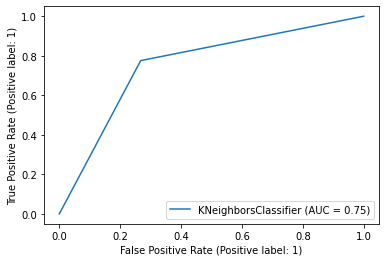

In [38]:
knn_disp = plot_roc_curve(knn, X_test, Y_test)
plt.show()

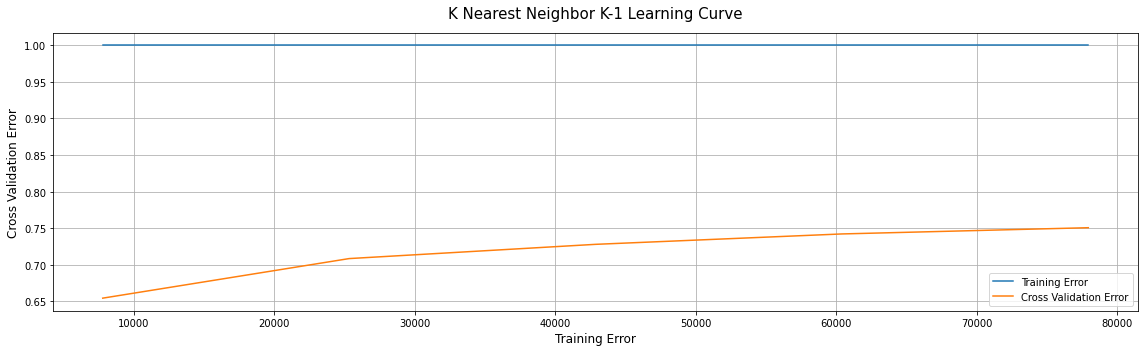

In [39]:
plt.figure(figsize = (16,5))
title ='K Nearest Neighbor K-1 Learning Curve'
plotLearningCurves(X_train, Y_train, knn, title)

In [40]:
#Results for neighbors =3

knn = KNeighborsClassifier(3)
knn.fit(X_train, Y_train)
knnPredictions3 = knn.predict(X_test)

print(accuracy_score(Y_test, knnPredictions3))
print(confusion_matrix(Y_test, knnPredictions3))
print(classification_report(Y_test, knnPredictions3))

0.7716661533723437
[[11050  3712]
 [ 3702 14006]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75     14762
           1       0.79      0.79      0.79     17708

    accuracy                           0.77     32470
   macro avg       0.77      0.77      0.77     32470
weighted avg       0.77      0.77      0.77     32470



/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


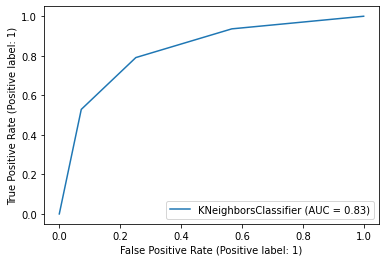

In [41]:
knn_disp = plot_roc_curve(knn, X_test, Y_test)
plt.show()

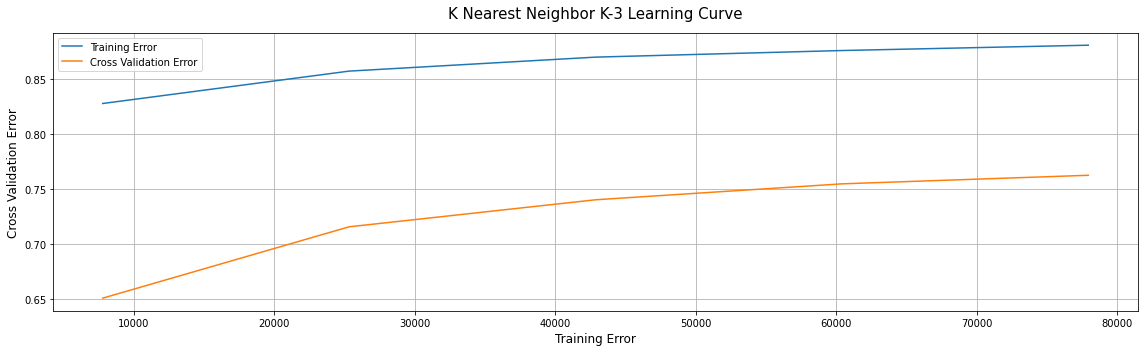

In [42]:
plt.figure(figsize = (16,5))
title ='K Nearest Neighbor K-3 Learning Curve'
plotLearningCurves(X_train, Y_train, knn, title)

In [43]:
#Results for neighbors =5

knn = KNeighborsClassifier(5)
knn.fit(X_train, Y_train)
knnPredictions5 = knn.predict(X_test)

print(accuracy_score(Y_test, knnPredictions5))
print(confusion_matrix(Y_test, knnPredictions5))
print(classification_report(Y_test, knnPredictions5))

0.7766861718509394
[[11070  3692]
 [ 3559 14149]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.75     14762
           1       0.79      0.80      0.80     17708

    accuracy                           0.78     32470
   macro avg       0.77      0.77      0.77     32470
weighted avg       0.78      0.78      0.78     32470



/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


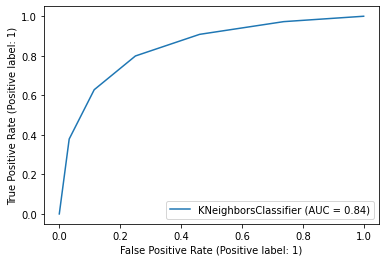

In [44]:
knn_disp = plot_roc_curve(knn, X_test, Y_test)
plt.show()

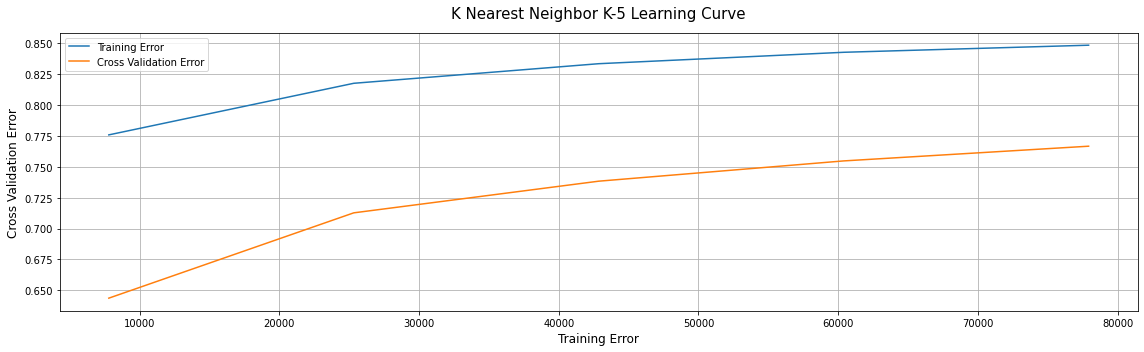

In [45]:
plt.figure(figsize = (16,5))
title ='K Nearest Neighbor K-5 Learning Curve'
plotLearningCurves(X_train, Y_train, knn, title)

In [46]:
#Results for neighbors =7

knn = KNeighborsClassifier(7)
knn.fit(X_train, Y_train)
knnPredictions7 = knn.predict(X_test)

print(accuracy_score(Y_test, knnPredictions7))
print(confusion_matrix(Y_test, knnPredictions7))
print(classification_report(Y_test, knnPredictions7))

0.7744379427163536
[[10929  3833]
 [ 3491 14217]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75     14762
           1       0.79      0.80      0.80     17708

    accuracy                           0.77     32470
   macro avg       0.77      0.77      0.77     32470
weighted avg       0.77      0.77      0.77     32470



/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


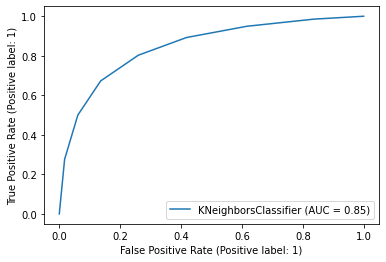

In [47]:
knn_disp = plot_roc_curve(knn, X_test, Y_test)
plt.show()

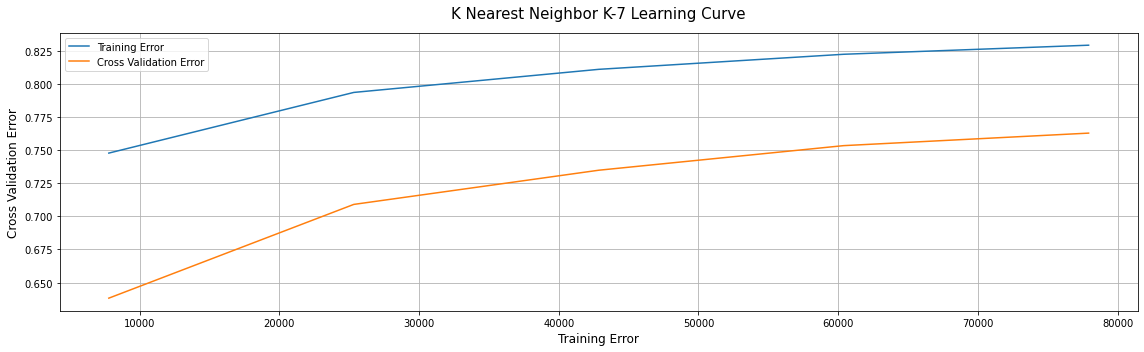

In [48]:
plt.figure(figsize = (16,5))
title ='K Nearest Neighbor K-7 Learning Curve'
plotLearningCurves(X_train, Y_train, knn, title)

In [49]:
#Results for neighbors =9

knn = KNeighborsClassifier(9)
knn.fit(X_train, Y_train)
knnPredictions9 = knn.predict(X_test)

print(accuracy_score(Y_test, knnPredictions9))
print(confusion_matrix(Y_test, knnPredictions9))
print(classification_report(Y_test, knnPredictions9))

0.7732368340006159
[[10879  3883]
 [ 3480 14228]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75     14762
           1       0.79      0.80      0.79     17708

    accuracy                           0.77     32470
   macro avg       0.77      0.77      0.77     32470
weighted avg       0.77      0.77      0.77     32470



/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


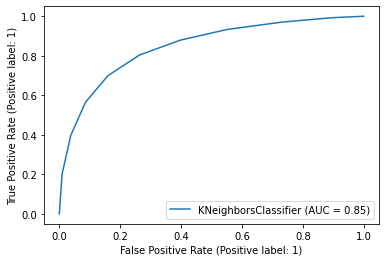

In [50]:
knn_disp = plot_roc_curve(knn, X_test, Y_test)
plt.show()

In [51]:
plt.figure(figsize = (16,5))
title ='K Nearest Neighbor K-7 Learning Curve'
plotLearningCurves(X_train, Y_train, knn, title)

#### the accuracy increased significantly when the neighbors increased to 3

In [ ]:
#validation Curve

knn = KNeighborsClassifier()
title = 'KNN Validation Curve'
parameter_name = 'n_neighbors'
parameter_range = np.arange(1,9,2)
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, Y_train, knn, parameter_name, parameter_range, title)

# Support Vector Machine Classifier


In [23]:
from sklearn.svm import SVC

svclassifier = SVC(C = 0.1 , gamma =1 ,kernel='sigmoid')
svclassifier.fit(X_train, Y_train)
# Make prediction
SvcPredictions1 = svclassifier.predict(X_test)
# Evaluate model
print(classification_report(Y_test,SvcPredictions1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14702
           1       0.55      1.00      0.71     17768

    accuracy                           0.55     32470
   macro avg       0.27      0.50      0.35     32470
weighted avg       0.30      0.55      0.39     32470



/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [24]:
plt.figure(figsize = (16,5))
title = 'Support Vector Machine Learning Curve'
plotLearningCurves(X_train, Y_train, svclassifier, title)

KeyboardInterrupt: 

<Figure size 1152x360 with 0 Axes>

In [ ]:
title = 'Support Vector Machine Validation Curve c=0.1'
param_name = 'C'
param_range = [0.1,1, 10]
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, Y_train, svclassifier, param_name, param_range, title)



In [25]:
#before tried with C=0.1, and gamma=1, and kernal = segmoid, accuracy = 0.9, then change the C parameter to 1 and check

svclassifier = SVC(C = 1 , gamma =1 ,kernel='sigmoid')
svclassifier.fit(X_train, Y_train)
# Make prediction
SvcPredictions2 = svclassifier.predict(X_test)
# Evaluate model
print(classification_report(Y_test,SvcPredictions2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14702
           1       0.55      1.00      0.71     17768

    accuracy                           0.55     32470
   macro avg       0.27      0.50      0.35     32470
weighted avg       0.30      0.55      0.39     32470



/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [ ]:
plt.figure(figsize = (16,5))
title = 'Support Vector Machine Learning Curve C=1'
plotLearningCurves(X_train, Y_train, svclassifier, title)

In [ ]:
title = 'Support Vector Machine Validation Curve C=1'
param_name = 'C'
param_range = [0.1,1, 10]
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, Y_train, svclassifier, param_name, param_range, title)

In [26]:
#before tried with C=1, and gamma=1, and kernal = segmoid, accuracy = 0.9 with no change happened, then change the C parameter to 10 and check

svclassifier = SVC(C = 10 , gamma =1 ,kernel='sigmoid')
svclassifier.fit(X_train, Y_train)
# Make prediction
SvcPredictions3 = svclassifier.predict(X_test)
# Evaluate model
print(classification_report(Y_test,SvcPredictions3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14702
           1       0.55      1.00      0.71     17768

    accuracy                           0.55     32470
   macro avg       0.27      0.50      0.35     32470
weighted avg       0.30      0.55      0.39     32470



/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [ ]:
plt.figure(figsize = (16,5))
title = 'Support Vector Machine Learning Curve C=10'
plotLearningCurves(X_train, Y_train, svclassifier, title)

In [ ]:
title = 'Support Vector Machine Validation Curve C=10'
param_name = 'C'
param_range = [0.1,1, 10]
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, Y_train, svclassifier, param_name, param_range, title)

In [27]:
#before tried with C=10, and gamma=1, and kernal = segmoid, accuracy = 0.9 with no change happened, then change the gamma to 0.01 and check

svclassifier = SVC(C = 10 , gamma =0.01 ,kernel='sigmoid')
svclassifier.fit(X_train, Y_train)
# Make prediction
SvcPredictions4 = svclassifier.predict(X_test)
# Evaluate model
print(classification_report(Y_test,SvcPredictions4))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14702
           1       0.55      1.00      0.71     17768

    accuracy                           0.55     32470
   macro avg       0.27      0.50      0.35     32470
weighted avg       0.30      0.55      0.39     32470



/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [ ]:
plt.figure(figsize = (16,5))
title = 'Support Vector Machine Learning Curve C=10'
plotLearningCurves(X_train, Y_train, svclassifier, title)

In [ ]:
title = 'Support Vector Machine Validation Curve C=10'
param_name = 'C'
param_range = [0.1,1, 10]
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, Y_train, svclassifier, param_name, param_range, title)

In [28]:
# now change the kernal parameter to rbf

svclassifier = SVC(C = 10 , gamma =0.01 ,kernel='rbf')
svclassifier.fit(X_train, Y_train)
# Make prediction
SvcPredictions5 = svclassifier.predict(X_test)
# Evaluate model
print(classification_report(Y_test,SvcPredictions5))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     14702
           1       0.86      0.86      0.86     17768

    accuracy                           0.84     32470
   macro avg       0.84      0.84      0.84     32470
weighted avg       0.84      0.84      0.84     32470



In [ ]:
plt.figure(figsize = (16,5))
title = 'Support Vector Machine Learning Curve'
plotLearningCurves(X_train, Y_train, svclassifier, title)

In [ ]:
title = 'Support Vector Machine Validation Curve with rbf kernel'
param_name = 'C'
param_range = [0.1,1, 10]
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, Y_train, svclassifier, param_name, param_range, title)

In [29]:
#change gamma parameter to 1 

svclassifier = SVC(C = 10 , gamma =1 ,kernel='rbf')
svclassifier.fit(X_train, Y_train)
# Make prediction
SvcPredictions6 = svclassifier.predict(X_test)
# Evaluate model
print(classification_report(Y_test,SvcPredictions6))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     14702
           1       0.55      1.00      0.71     17768

    accuracy                           0.55     32470
   macro avg       0.77      0.50      0.35     32470
weighted avg       0.75      0.55      0.39     32470



In [ ]:
plt.figure(figsize = (16,5))
title = 'Support Vector Machine Learning Curve'
plotLearningCurves(X_train, Y_train, svclassifier, title)

In [ ]:
title = 'Support Vector Machine Validation Curve with rbf kernel, gamma =1'
param_name = 'C'
param_range = [0.1,1, 10]
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, Y_train, svclassifier, param_name, param_range, title)

* Increased the higher variance when the gamma parameter is 1.
* Therefore,best parameters are 
    C=10 , gamma = 0.01 , kernal = segmoid for prediction

In [31]:
#best prediction

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01],'kernel': ['sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
svclassifier7 = grid.fit(X_train,Y_train)
SvcPredictions7 = svclassifier7.predict(X_test)
print(grid.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=13.0min
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=12.9min
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=12.9min
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=13.0min
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=13.0min
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=13.0min
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=13.1min
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=13.1min
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=13.3min
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=13.2min
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=13.2min
[CV] END ..................C=0.1, gamma=0.01, ker

In [32]:
print(accuracy_score(Y_test, SvcPredictions7))
print(confusion_matrix(Y_test, SvcPredictions7))
print(classification_report(Y_test, SvcPredictions7))

0.5472128118263012
[[    0 14702]
 [    0 17768]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14702
           1       0.55      1.00      0.71     17768

    accuracy                           0.55     32470
   macro avg       0.27      0.50      0.35     32470
weighted avg       0.30      0.55      0.39     32470



/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kosala/Desktop/FDM Final/FDM/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu